## Content
This is our my practice about Regression. It's just cover code so to get more details about algorithms you can find in Hands_on_machine_learning_with_scikit_learn book (bonus: Introduce_to_statistical_learning).
- [Linear regression](#Linear-regression)
- [Polynomial Regression](#Polynomial-Regression)

# Linear regression

In [1]:
# createa a dataset
import numpy as np

np.random.seed(1993)
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X +np.random.rand(100,1)
X_new = [[0], [3]]

>### Use Linearegression from sklearn

In [2]:
# use Linearegression from sklearn
from sklearn.linear_model import LinearRegression

lng = LinearRegression(normalize = True)
lng.fit(X,y)
print("intercept: {}".format(lng.intercept_),
     "coef: {}".format(lng.coef_),
     "score: {}".format(lng.score(X, y)))

intercept: [ 4.48409354] coef: [[ 3.02083152]] score: 0.9717836808399598


score return coef of R^2: (1 - u/v) (bestscore is 1.0)
- u: ((y_true - y_pred) ** 2).sum()
- v: ((y_true - y_true.mean()) ** 2).sum()

In [3]:
lng.predict(X_new)

array([[  4.48409354],
       [ 13.54658809]])

>### Use matrix

In [4]:
def linear(X, y):
    X_b = np.c_[np.ones(np.shape(X)), X]
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta

def lng_predict(X, y, X_test):
    theta = linear(X, y)
    X_test = np.c_[np.ones(np.shape(X_test)), X_test]
    y_predict = X_test.dot(theta)
    return y_predict

In [5]:
linear(X, y)

array([[ 4.48409354],
       [ 3.02083152]])

>### Use GD

In [6]:
# find theta by gd:
def find_theta(X, y, n):
    '''n is n_interation'''
    m = np.shape(X)[0]
    number_of_feature = np.shape(X)[1] + 1
    theta = np.zeros((number_of_feature, 1))
    eta = 0.1
    X_b = np.c_[np.ones((np.shape(X)[0], 1)), X]
    for i in range(n):
        garidents = 1 / m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * garidents
    return theta
# use grid search to find good learning rate (eta)

In [7]:
find_theta(X, y, 1000)

array([[ 4.48409229],
       [ 3.02083255]])

>### Usr SGD

In [8]:
# Stochastic GD
def SGD(X, y, n):
    '''n is number of epoch'''
    eta = 0.1
    m = np.shape(X)[0]
    theta = np.zeros((np.shape(X)[1] + 1, 1))
    X_b = np.c_[np.ones((np.shape(X)[0],1)), X]
    for epoch in range(n):
        list_index = np.random.permutation(range(m))
        for i in list_index:
            x_i = X_b[i:i+1]
            y_i = y[i:i+1]
            gradient = 2 * x_i.T.dot(x_i.dot(theta) - y_i)
            theta = theta - eta * gradient
    return theta

In [9]:
SGD(X, y, 50)

array([[ 4.46781139],
       [ 2.99121631]])

>### Use SGDregressor

In [10]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(n_iter = 50, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, y.ravel())
print(sgd_reg.intercept_, sgd_reg.coef_)

[ 4.49453729] [ 3.03111343]


/home/mmr/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


In [11]:
SGDRegressor?

In [12]:
y_predict = lng_predict(X, y, X_new)
print(y_predict)

[[  4.48409354]
 [ 13.54658809]]


In [13]:
# visualize result
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, 'b-', label = 'predictions')
plt.plot(X, y, 'r.')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.axis([0, 2, 0, 15])

[0, 2, 0, 15]

# Polynomial Regression

 - *train_test_split to split data set*
 - *pipline to add more steps in one function*

In [14]:
# make a data set
m = 100
X = np.random.rand(m,1)
y = 0.5 * X**2 + X + 2 +np.random.rand(m, 1)

In [15]:
# poly transform
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly.fit_transform(X)

In [16]:
# use linearregression to fit data
lng.fit(X_poly, y)
print(lng.intercept_, lng.coef_)

[ 2.49850833] [[ 0.70756463  0.74012577]]


In [17]:
# learning curve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def learning_curve_plot (model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    train_error, test_error = [], []
    for i in range(1, len(X_train)):
        model.fit(X_train[:i], y_train[:i])
        y_train_predict = model.predict(X_train[:i])
        y_test_predict = model.predict(X_test)
        train_error.append(mean_squared_error(y_train_predict, y_train[:i]))
        test_error.append(mean_squared_error(y_test_predict, y_test))
    plt.plot(np.sqrt(train_error), 'b-', linewidth = 2, label = "train")
    plt.plot(np.sqrt(test_error), 'r+', linewidth = 3, label = "test")
    plt.legend()

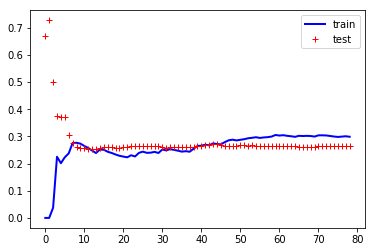

In [18]:
learning_curve_plot(lng, X, y)

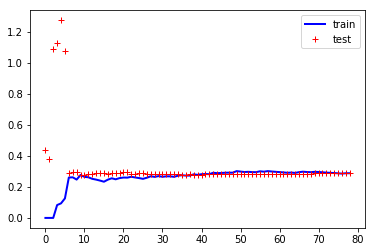

In [19]:
from sklearn.pipeline import Pipeline

poly_regression = Pipeline((("poly_feature", PolynomialFeatures(degree = 2, include_bias = False)),
                          ("linearregresion", LinearRegression())
                          ))
learning_curve_plot(poly_regression, X, y)

 why overfit
- use poly feature to transforme data to linear data
- THE BIAS/VARIANCE TRADEOFF: bias make underfit, otherwise variance make overfit

> ### Regularized linnear model

What are the types of Regressions?
- Linear Regression
- Logistic Regression
- Polynomial Regression
- Stepwise Regression
- Ridge Regression
- Lasso Regression
- ElasticNet Regression

Regression regularization methods(Lasso, Ridge and ElasticNet) works well in case of high dimensionality and multicollinearity among the variables in the data set. Just have a few features is useful: Lasso & ElasticNet. number of fetures greater than instances or correlation between features: ElasticNet

> ### Early stop

In [20]:
from sklearn.base import clone

def early_stop(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    sgd_reg = SGDRegressor(n_iter = 1, eta0 = 0.0005, penalty = None,
                          warm_start = True, learning_rate = 'constant')
    #n_iter =1 but warm_start = True, sgd will countinues where it left off

    minimun_val_error = float('inf')
    best_epoch = None
    best_model = None
    for epoch in range(1000):
        sgd_reg.fit(X_train, y_train)
        y_predict_sgd = sgd_reg.predict(X_test)
        val_error = mean_squared_error(y_predict_sgd, y_test)
        if val_error < minimun_val_error:
            minimun_val_error = val_error
            best_epoch = epoch
            best_model = clone(sgd_reg)
    return minimun_val_error, best_epoch, best_model

val_error, best_epoch, best_model = early_stop(X, y)

/home/mmr/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

/home/mmr/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

/home/mmr/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

/home/mmr/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

/home/mmr/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

/home/mmr/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True

/home/mmr/.local/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)
/home/mmr/.local/lib/python3.5/

In [21]:
print(val_error, best_epoch)

0.106337309489 999


>### More Information
- regression with two labels
- Evaluating Metrics of Regression model is MSE

# Logistic regression

- If p > 0.50 then observations belong to positive label('1'), else it belong to negative('0')

In [31]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.utils import shuffle

iris = load_iris()
iris.keys()

dict_keys(['target_names', 'feature_names', 'target', 'DESCR', 'data'])

In [37]:
iris_X = iris['data']
iris_y = (iris['target'] == 2).astype(np.int)
iris_X, iris_y = shuffle( iris_X, iris_y)
iris_X_train, iris_X_test, iris_y_train, iris_y_test = train_test_split(iris_X, iris_y, test_size = 0.2)

In [52]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()
lgr.fit(iris_X_train, iris_y_train)
lgr_pro = lgr.predict_proba(iris_X_test)

def convert_to_float(input_list):
    final_list = []
    for i in input_list:
        final_list.append(float(i))
    return final_list

lgr_pro1 = [convert_to_float(x) for x in lgr_pro]
lgr_pro1

[[0.7602147793211513, 0.2397852206788487],
 [0.3050635065260733, 0.6949364934739267],
 [0.99996076287727, 3.9237122730029675e-05],
 [0.4855715042445131, 0.5144284957554869],
 [0.14560674848934663, 0.8543932515106534],
 [0.9999643267525877, 3.5673247412279075e-05],
 [0.3781650547299963, 0.6218349452700037],
 [0.18576468205437602, 0.814235317945624],
 [0.9175622900117586, 0.08243770998824144],
 [0.11866144947272261, 0.8813385505272774],
 [0.9999490597470188, 5.094025298120569e-05],
 [0.37875802372034784, 0.6212419762796522],
 [0.63630060458524, 0.3636993954147601],
 [0.22867633667691822, 0.7713236633230818],
 [0.9999749753133752, 2.5024686624770685e-05],
 [0.8809078382689931, 0.11909216173100692],
 [0.9998217004684972, 0.00017829953150284882],
 [0.9999407986013393, 5.920139866064851e-05],
 [0.07958618968422904, 0.920413810315771],
 [0.9999770500187464, 2.2949981253658633e-05],
 [0.9999202129517005, 7.978704829947171e-05],
 [0.4222924339477645, 0.5777075660522355],
 [0.9998458581524668, 0

In [68]:
lgr_predict = lgr.predict(iris_X_test)
lgr.score(iris_X_test, iris_y_test)
#return mean accuracy

0.96666666666666667

In [71]:
lgr_predict = lgr.predict(iris_X_test)
lgr_predict

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0])

In [57]:
iris_y_test

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0])

In [72]:
from sklearn.metrics import log_loss

log_loss_scoe = log_loss(iris_y_test, lgr_pro1)
log_loss_scoe
#log_loss score

0.17467805223512628

>### Softmax Regression

In [77]:
softmax = LogisticRegression(multi_class = 'multinomial', solver ='lbfgs', C = 10)
iris_X1, iris_y1 = shuffle( iris.data, iris.target)
iris_X1_train, iris_X1_test, iris_y1_train, iris_y1_test = train_test_split(iris_X1, iris_y1)

In [79]:
softmax.fit(iris_X1_train, iris_y1_train)
softmax_predict = softmax.predict(iris_X1_test)
print(softmax_predict)

[0 0 0 0 2 0 1 0 0 2 0 1 2 0 2 2 2 1 1 2 0 1 1 1 1 0 2 2 1 2 1 1 2 0 2 1 1
 1]


In [80]:
iris_y1_test

array([0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 1, 2, 0, 2, 2, 2, 1, 1, 2, 0, 1, 1,
       1, 2, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1])

In [83]:
softmax.score(iris_X1_test, iris_y1_test)

0.97368421052631582

>### More Information
- Evaluating metrics of logistic Regression is Log-Loss